João Inácio Scrimini - 202370701

Usei o VS Code, com diretório direto do ambiente em que estava o arquivo.

In [1]:
import pandas as pd
precipitacao = pd.read_csv("dataset_reg_chuva_santa_maria_2011_2020.csv", sep=';', decimal=',')
print(precipitacao)
precipitacao.dtypes

      CD_ESTACAO  DT_MEDICAO  HR_MEDICAO  CHUVA
0           A803  2011-01-01         100    0.0
1           A803  2011-01-01         200    0.0
2           A803  2011-01-01         300    0.0
3           A803  2011-01-01         500    0.0
4           A803  2011-01-01         600    0.0
...          ...         ...         ...    ...
52685       A803  2020-12-31        1600    0.0
52686       A803  2020-12-31        1700    0.0
52687       A803  2020-12-31        1800    0.0
52688       A803  2020-12-31        1900    0.0
52689       A803  2020-12-31        2000    0.0

[52690 rows x 4 columns]


CD_ESTACAO     object
DT_MEDICAO     object
HR_MEDICAO      int64
CHUVA         float64
dtype: object

In [2]:
pd.to_datetime(precipitacao['DT_MEDICAO'])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
52685   2020-12-31
52686   2020-12-31
52687   2020-12-31
52688   2020-12-31
52689   2020-12-31
Name: DT_MEDICAO, Length: 52690, dtype: datetime64[ns]

1. Uma tabela com uma coluna contendo todos os trimestres de 2011-2020 e as respectivas precipitações acumuladas:

In [3]:
# Convertendo as datas diárias em trimestrais
precipitacao['Trimestre'] = pd.to_datetime(precipitacao['DT_MEDICAO']).dt.to_period('Q')

# Somando os valores de cada trimestre
precipitacao_trimestral = precipitacao.groupby('Trimestre').sum()
precipitacao_trimestral.drop(columns=['HR_MEDICAO'], inplace=True)
precipitacao_trimestral

,CHUVA
Trimestre,
2011Q1,233.6
2011Q2,216.4
2011Q3,82.6
2011Q4,191.4
2012Q1,238.0
2012Q2,155.4
2012Q3,179.8
2012Q4,438.6
2013Q1,332.2


2. Um gráfico com a evolução da precipitação que contenha todos os trimestres:

[]

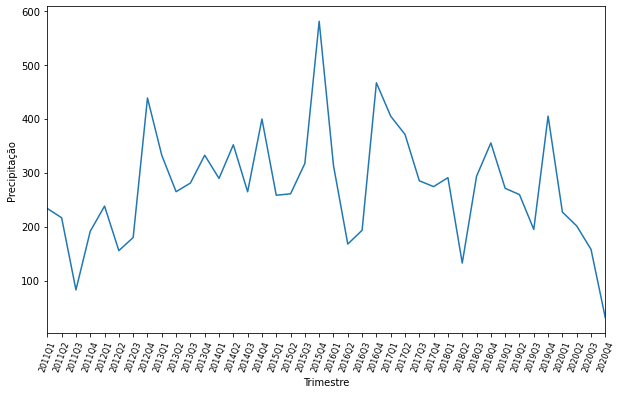

In [4]:
import matplotlib.pyplot as plt
precipitacao_trimestral.plot(figsize=(10,6),legend=False)
plt.ylabel("Precipitação")
plt.xticks(precipitacao_trimestral.index,precipitacao_trimestral.index, rotation=70,fontsize=8)
plt.plot()

3. As observações sobre o número de medidas perdidas (dados faltantes) nos trimestres de 2011-2020:

Unindo a data com a hora:

In [5]:
precipitacao['DataHora'] = precipitacao['DT_MEDICAO'] + " " + (precipitacao['HR_MEDICAO'] // 100).astype(str) +':00'
precipitacao['DataHora']  = pd.to_datetime(precipitacao['DataHora'])
precipitacao['DataHora']

0       2011-01-01 01:00:00
1       2011-01-01 02:00:00
2       2011-01-01 03:00:00
3       2011-01-01 05:00:00
4       2011-01-01 06:00:00
                ...        
52685   2020-12-31 16:00:00
52686   2020-12-31 17:00:00
52687   2020-12-31 18:00:00
52688   2020-12-31 19:00:00
52689   2020-12-31 20:00:00
Name: DataHora, Length: 52690, dtype: datetime64[ns]

Colocando a DataHora para o index do data frame:

In [6]:
precipitacao.set_index('DataHora', inplace=True)
precipitacao.index

DatetimeIndex(['2011-01-01 01:00:00', '2011-01-01 02:00:00',
               '2011-01-01 03:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 11:00:00', '2011-01-01 12:00:00',
               '2011-01-01 13:00:00', '2011-01-01 15:00:00',
               ...
               '2020-12-31 09:00:00', '2020-12-31 10:00:00',
               '2020-12-31 11:00:00', '2020-12-31 14:00:00',
               '2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00'],
              dtype='datetime64[ns]', name='DataHora', length=52690, freq=None)

Pegando o range total de data e horas existentes no periodo inicial ao final e reorganizando o Data Frame com a data/hora completa:

In [7]:
date_range = pd.date_range(start=precipitacao.index.min(), end=precipitacao.index.max(), freq='H')
precipitacao1 = precipitacao.reindex(date_range)
precipitacao1

,CD_ESTACAO,DT_MEDICAO,HR_MEDICAO,CHUVA,Trimestre
2011-01-01 01:00:00,A803,2011-01-01,100.0,0.0,2011Q1
2011-01-01 02:00:00,A803,2011-01-01,200.0,0.0,2011Q1
2011-01-01 03:00:00,A803,2011-01-01,300.0,0.0,2011Q1
2011-01-01 04:00:00,NaN,NaN,NaN,NaN,NaT
2011-01-01 05:00:00,A803,2011-01-01,500.0,0.0,2011Q1
...,...,...,...,...,...
2020-12-31 16:00:00,A803,2020-12-31,1600.0,0.0,2020Q4
2020-12-31 17:00:00,A803,2020-12-31,1700.0,0.0,2020Q4
2020-12-31 18:00:00,A803,2020-12-31,1800.0,0.0,2020Q4
2020-12-31 19:00:00,A803,2020-12-31,1900.0,0.0,2020Q4


Reorganizando novamente os trimestre com todas as datas;

Fazendo a soma de todos os dados faltantes presentes no banco com base nos trimestres;

Acrescentando o total ao fim da tabela:

In [8]:
precipitacao1['Trimestre'] = precipitacao1.index.to_period('Q')
precipitacao_faltante=precipitacao1.groupby('Trimestre')['CHUVA'].apply(lambda x: x.isna().sum()).reset_index(name='Valores Faltantes')
precipitacao_faltante.append({'Trimestre':'Total:','Valores Faltantes':precipitacao_faltante['Valores Faltantes'].sum()},ignore_index=True)

C:\Users\joaoi\AppData\Local\Temp\ipykernel_2640\1931288678.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precipitacao_faltante.append({'Trimestre':'Total:','Valores Faltantes':precipitacao_faltante['Valores Faltantes'].sum()},ignore_index=True)


,Trimestre,Valores Faltantes
0,2011Q1,895
1,2011Q2,974
2,2011Q3,1470
3,2011Q4,866
4,2012Q1,853
5,2012Q2,939
6,2012Q3,1003
7,2012Q4,831
8,2013Q1,893
9,2013Q2,867
